# Matplotlib数据可视化画图
[原址](https://tianchi.aliyun.com/course/courseConsole?spm=5176.12282070.0..6b1b290awzgoup&courseId=261)
## 如下有两份数据：

1970~2011年，美国女性在各个专业的学士学位获取比例的情况:percent-bachelors-degrees-women-usa.csv

鸢尾花数据：iris.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 基础绘图

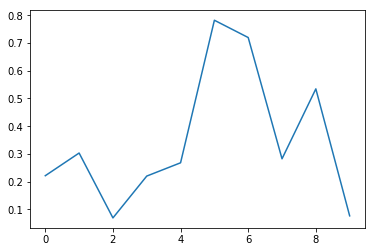

In [2]:
# 图表窗口1 → plt.show()
plt.plot(np.random.rand(10))

### 2. 图表的基本元素
- 图名
- x轴标签
- y轴标签
- 图例
- x轴边界
- y轴边界
- x刻度
- y刻度
- x刻度标签
- y刻度标签
- 注意：范围只限定图表的长度，刻度则是决定显示的标尺
      （观察下图就可以得出二者之间的关系）


[Text(0, 0, '0.00'),
 Text(0, 0, '0.20'),
 Text(0, 0, '0.40'),
 Text(0, 0, '0.60'),
 Text(0, 0, '0.80'),
 Text(0, 0, '1.00'),
 Text(0, 0, '1.20')]

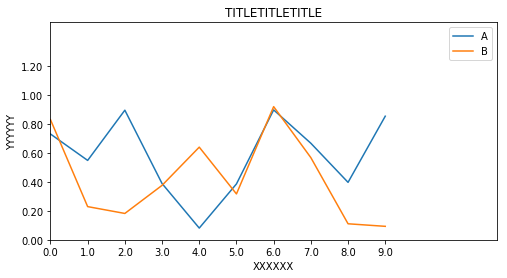

In [3]:
df = pd.DataFrame(np.random.rand(10,2),columns=['A','B'])

fig = df.plot(figsize=(8,4))  # figsize：创建图表窗口，设置窗口大小


plt.title('TITLETITLETITLE')  # 图名
plt.xlabel('XXXXXX')  # x轴标签
plt.ylabel('YYYYYY') # y轴标签

plt.legend(loc = 'upper right') # 显示图例，loc表示位置

plt.xlim([0,12])  # x轴边界
plt.ylim([0,1.5])  # y轴边界

plt.xticks(range(10))  # 设置x刻度
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2])  # 设置y刻度

fig.set_xticklabels("%.1f" %i for i in range(10))  # x轴刻度标签
fig.set_yticklabels("%.2f" %i for i in [0,0.2,0.4,0.6,0.8,1.0,1.2])  # y轴刻度标签

# 这里x轴范围是0-12，但刻度只是0-9，刻度标签使得其显示1位小数


### 3. 图表样式
- linestyle
- color
- marker
- style (linestyle、marker、color)
- alpha
- colormap
- grid
- color参考：https://matplotlib.org/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py

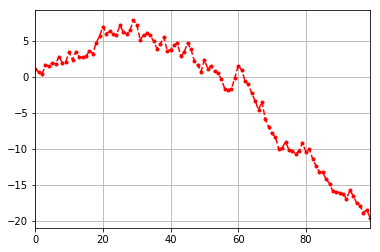

In [4]:
#  独立设置
s = pd.Series(np.random.randn(100).cumsum())
s.plot(linestyle = '--',
       marker = '.',
       color="r",
      grid=True)

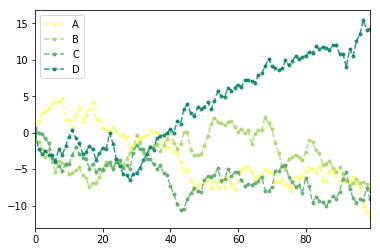

In [5]:
# 直接用风格样式设置
# 透明度与颜色版
# s.plot(style="--.",alpha = 0.8,colormap = 'Reds_r')
df = pd.DataFrame(np.random.randn(100, 4),columns=list('ABCD')).cumsum()
df.plot(style = '--.',alpha = 0.8,colormap = 'summer_r')

### 4. 图标注解

Text(5, 0.5, 'Hello')

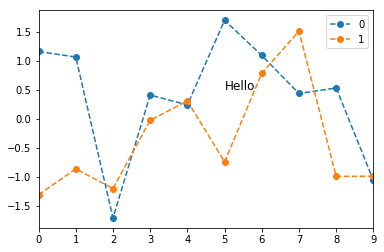

In [6]:
df = pd.DataFrame(np.random.randn(10,2))
df.plot(style = '--o')
plt.text(5,0.5,'Hello',fontsize=12)  

### 5. 子图绘制
plt.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, **kwargs)
plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)[source]
#### 5.1 figure对象

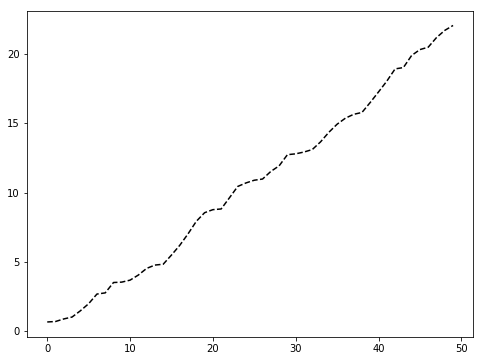

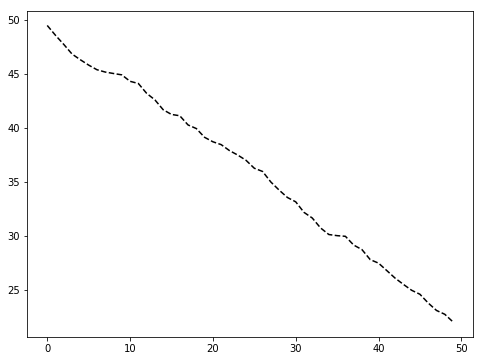

In [7]:
fig1 = plt.figure(num=1,figsize=(8,6))
plt.plot(np.random.rand(50).cumsum(),'k--')
fig2 = plt.figure(num=2,figsize=(8,6))
plt.plot(50-np.random.rand(50).cumsum(),'k--')

#### 5.2 建子图后填充图表

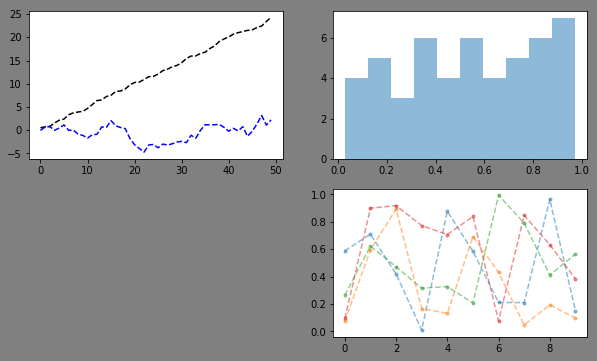

In [8]:
# 先建立子图然后填充图表
fig = plt.figure(figsize=(10,6),facecolor = 'gray')

ax1 = fig.add_subplot(2,2,1)
plt.plot(np.random.rand(50).cumsum(),'k--')
plt.plot(np.random.randn(50).cumsum(),'b--')

ax2 = fig.add_subplot(2,2,2)
ax2.hist(np.random.rand(50),alpha=0.5)

ax4 = fig.add_subplot(2,2,4) 
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
ax4.plot(df2,alpha=0.5,linestyle='--',marker='.')

#### 5.3 使用subplots子图数组填充图标

[[<matplotlib.axes._subplots.AxesSubplot object at 0x115336eb8>
  <matplotlib.axes._subplots.AxesSubplot object at 0x11540cf98>]] (2, 3) <class 'numpy.ndarray'>


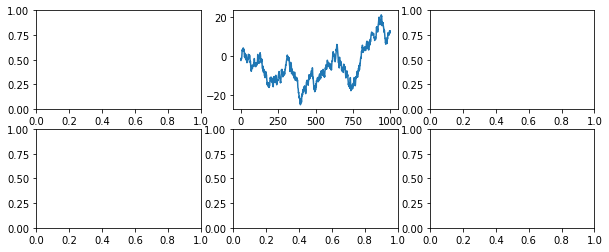

In [9]:
# 创建一个新的figure，并返回一个subplot对象的numpy数组 → plt.subplot

fig,axes = plt.subplots(2,3,figsize=(10,4))
ts = pd.Series(np.random.randn(1000).cumsum())
print(axes, axes.shape, type(axes))
# 生成图表对象的数组

ax1 = axes[0,1]
ax1.plot(ts)

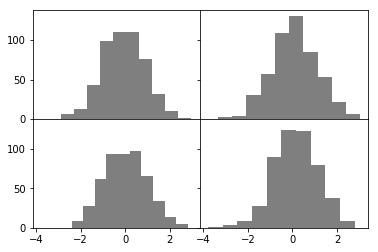

In [10]:
# plt.subplots 参数调整
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
# sharex,sharey：是否共享x，y刻度

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),color='k',alpha=0.5)
        
# wspace,hspace：用于控制宽度和高度的百分比，比如subplot之间的间距
plt.subplots_adjust(wspace=0,hspace=0)

#### 5.4 多系列图绘制
plt.plot()：

- subplots，是否分别绘制系列（子图）
- layout：绘制子图矩阵，按顺序填充

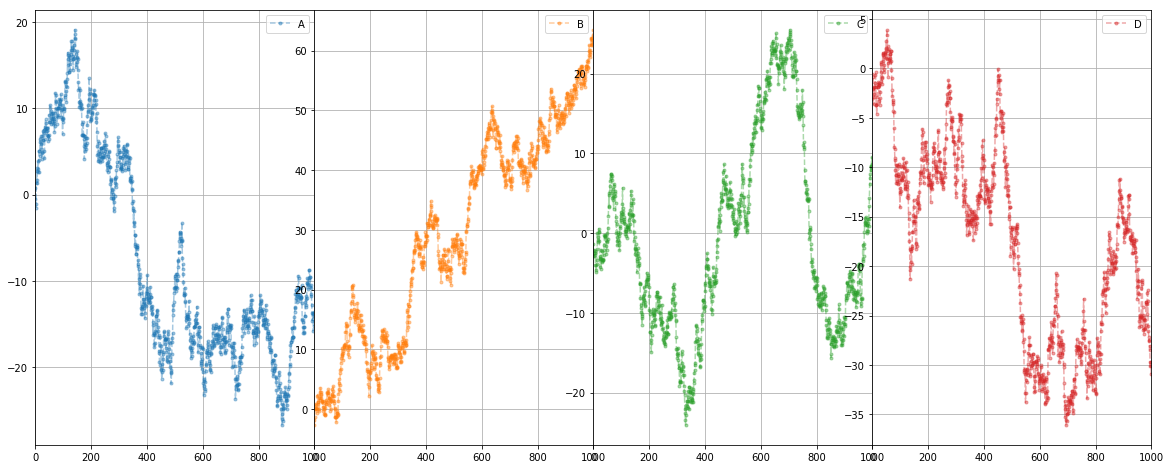

In [11]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(style = '--.',alpha = 0.4,grid = True,figsize = (20,8),
       subplots = True,
       layout = (1,4),
       sharex = False)
plt.subplots_adjust(wspace=0,hspace=0.2)

### 6. 基本图表绘制
#### 6.1 Series 与 DataFrame 绘图
plt.plot(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, 
style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, 
rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)
参数含义：

- series的index为横坐标
- value为纵坐标
- kind → line,bar,barh...（折线图，柱状图，柱状图-横...）
- label → 图例标签，Dataframe格式以列名为label
- style → 风格字符串，这里包括了linestyle（-），marker（.），color（g）
- color → 颜色，有color指定时候，以color颜色为准
- alpha → 透明度，0-1
- use_index → 将索引用为刻度标签，默认为True
- rot → 旋转刻度标签，0-360
- grid → 显示网格，一般直接用plt.grid
- xlim,ylim → x,y轴界限
- xticks,yticks → x,y轴刻度值
- figsize → 图像大小
- title → 图名
- legend → 是否显示图例，一般直接用plt.legend()

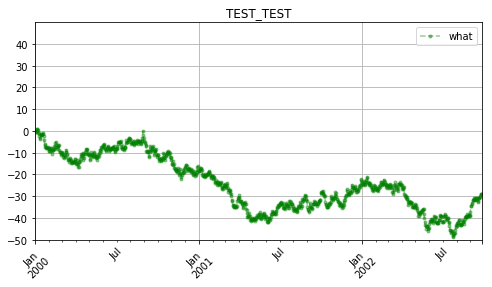

In [12]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000)) # pandas 时间序列
ts = ts.cumsum()
ts.plot(kind='line',
       label = "what",
       style = '--.',
       color = 'g',
       alpha = 0.4,
       use_index = True,
       rot = 45,
       grid = True,
       ylim = [-50,50],
       yticks = list(range(-50,50,10)),
       figsize = (8,4),
       title = 'TEST_TEST',
       legend = True)
# 对网格项进行更加细致的设置
#plt.grid(True, linestyle = "--",color = "gray", linewidth = "0.5",axis = 'x')  # 网格
plt.legend()

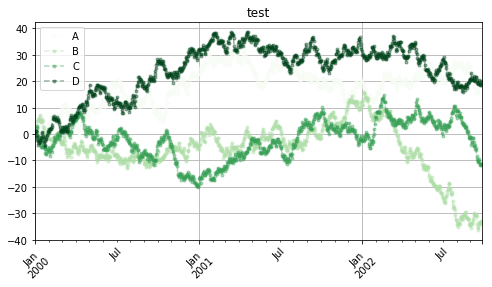

In [13]:
# subplots → 是否将各个列绘制到不同图表，默认False
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD')).cumsum()
df.plot(kind='line',
       style = '--.',
       alpha = 0.4,
       use_index = True,
       rot = 45,
       grid = True,
       figsize = (8,4),
       title = 'test',
       legend = True,
       subplots = False,
       colormap = 'Greens')

#### 6.2 柱状图
- plt.plot(kind='bar/barh')

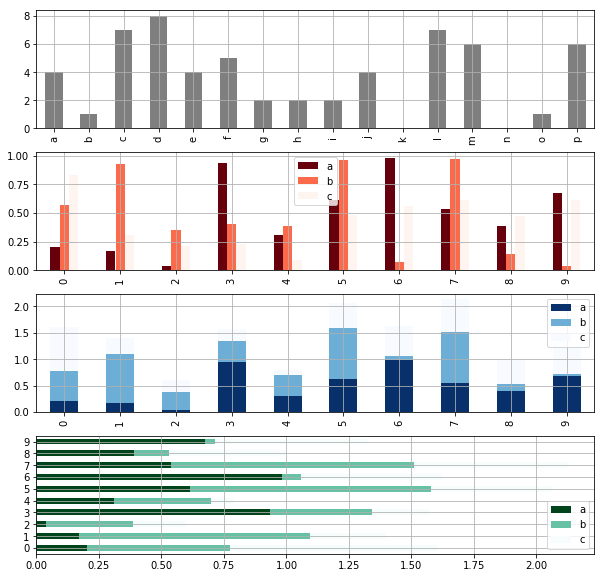

In [14]:
# 创建一个新的figure，并返回一个subplot对象的numpy数组
fig,axes = plt.subplots(4,1,figsize = (10,10))

s = pd.Series(np.random.randint(0,10,16),index = list('abcdefghijklmnop'))  
df = pd.DataFrame(np.random.rand(10,3), columns=['a','b','c'])

# 单系列柱状图方法一：plt.plot(kind='bar/barh')
s.plot(kind='bar',color = 'k',grid = True,alpha = 0.5,ax = axes[0])  # ax参数 → 选择第几个子图

# 多系列柱状图
df = pd.DataFrame(np.random.rand(10,3), columns=['a','b','c'])
df.plot(kind='bar',ax = axes[1],grid = True,colormap='Reds_r')

# 多系列堆叠图
# stacked → 堆叠
df.plot(kind='bar',ax = axes[2],grid = True,colormap='Blues_r',stacked=True) 

# The bars are positioned at y with the given align. Their dimensions are given by width and height. The horizontal baseline is left (default 0). 
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html?highlight=barh#matplotlib.pyplot.barh
df.plot.barh(ax = axes[3],grid = True,stacked=True,colormap = 'BuGn_r')

- plt.bar()
    - x,y参数：x，y值
    - width：宽度比例
    - facecolor柱状图里填充的颜色、edgecolor是边框的颜色
    - left-每个柱x轴左边界,bottom-每个柱y轴下边界 → bottom扩展即可化为甘特图 Gantt Chart
    - align：决定整个bar图分布，默认left表示默认从左边界开始绘制,center会将图绘制在中间位置
    - xerr/yerr ：x/y方向error bar


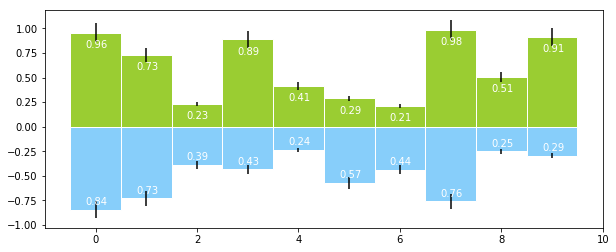

In [15]:
plt.figure(figsize=(10,4))

x = np.arange(10)
y1 = np.random.rand(10)
y2 = -np.random.rand(10)

plt.bar(x,y1,width = 1,facecolor = 'yellowgreen',edgecolor = 'white',yerr = y1*0.1)
plt.bar(x,y2,width = 1,facecolor = 'lightskyblue',edgecolor = 'white',yerr = y2*0.1)

for i,j in zip(x,y1):
    plt.text(i-0.2,j-0.15,'%.2f' % j, color = 'white')
for i,j in zip(x,y2):
    plt.text(i-0.2,j+0.05,'%.2f' % -j, color = 'white')
# 给图添加text
# zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。

### 6.3 面积图
- stacked：是否堆叠，默认情况下，区域图被堆叠
- 为了产生堆积面积图，每列必须是正值或全部负值！
- 当数据有NaN时候，自动填充0，图标签需要清洗掉缺失值

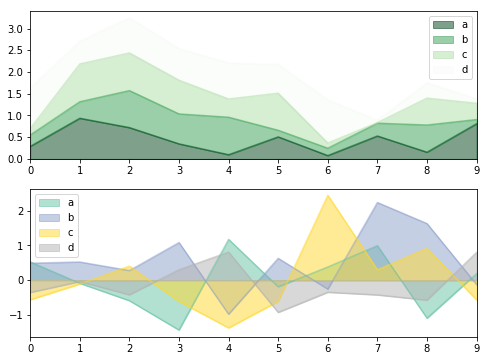

In [16]:
fig,axes = plt.subplots(2,1,figsize = (8,6))

df1 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(10, 4), columns=['a', 'b', 'c', 'd'])

df1.plot.area(colormap = 'Greens_r',alpha = 0.5,ax = axes[0])
df2.plot.area(stacked=False,colormap = 'Set2',alpha = 0.5,ax = axes[1])

### 6.4 填图

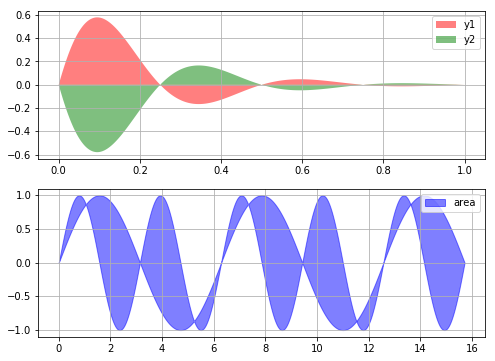

In [18]:
fig,axes = plt.subplots(2,1,figsize = (8,6))

x = np.linspace(0, 1, 500)
y1 = np.sin(4 * np.pi * x) * np.exp(-5 * x)
y2 = -np.sin(4 * np.pi * x) * np.exp(-5 * x)

axes[0].fill(x, y1, 'r',alpha=0.5,label='y1')
axes[0].fill(x, y2, 'g',alpha=0.5,label='y2')
# 对函数与坐标轴之间的区域进行填充，使用fill函数
# 也可写成：plt.fill(x, y1, 'r',x, y2, 'g',alpha=0.5)

x = np.linspace(0, 5 * np.pi, 1000) 
y1 = np.sin(x)  
y2 = np.sin(2 * x)  
axes[1].fill_between(x, y1, y2, color ='b',alpha=0.5,label='area')  
# 填充两个函数之间的区域，使用fill_between函数

for i in range(2):
    axes[i].legend()
    axes[i].grid()

### 6.5 饼图¶
plt.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, hold=None, data=None)

参数含义：

- 第一个参数：数据
- explode：指定每部分的偏移量
- labels：标签
- colors：颜色
- autopct：饼图上的数据标签显示方式
- pctdistance：每个饼切片的中心和通过autopct生成的文本开始之间的比例
- labeldistance：被画饼标记的直径,默认值：1.1
- shadow：阴影
- startangle：开始角度
- radius：半径
- frame：图框
- counterclock：指定指针方向，顺时针或者逆时针

([<matplotlib.patches.Wedge at 0x11693e208>,
 [Text(1.8496458676872465, 0.43452291556083966, 'a'),
  Text(-0.2397166449614771, 1.7839663478127643, 'b'),
  Text(-1.7878287160396371, -0.2089700507346974, 'c'),
  Text(0.3814265436087001, -1.759123017821869, 'd')],
 [Text(0.9734978250985509, 0.22869627134781034, '7.34%'),
  Text(-0.11985832248073855, 0.8919831739063822, '39.56%'),
  Text(-0.8939143580198186, -0.1044850253673487, '9.89%'),
  Text(0.19071327180435005, -0.8795615089109345, '43.20%')])

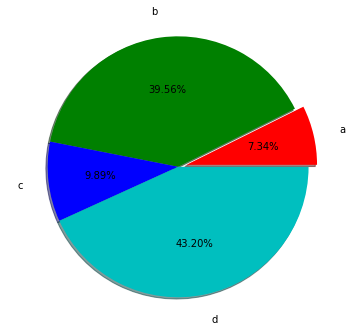

In [19]:
s = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
plt.axis('equal')  # 保证长宽相等
plt.pie(s,
       explode = [0.1,0,0,0],
       labels = s.index,
       colors=['r', 'g', 'b', 'c'],
       autopct='%.2f%%',
       pctdistance=0.6,
       labeldistance = 1.2,
       shadow = True,
       startangle=0,
       radius=1.5,
       frame=False)

### 6.6 直方图

plt.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, 
histtype='bar', align='mid', orientation='vertical',rwidth=None, log=False, color=None, label=None, 
stacked=False, hold=None, data=None, **kwargs)

- bin：箱子的宽度
- normed 标准化
- histtype 风格，bar，barstacked，step，stepfilled
- orientation 水平还是垂直{‘horizontal’, ‘vertical’}
- align : {‘left’, ‘mid’, ‘right’}, optional(对齐方式)
- stacked：是否堆叠

/anaconda3/envs/dl/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


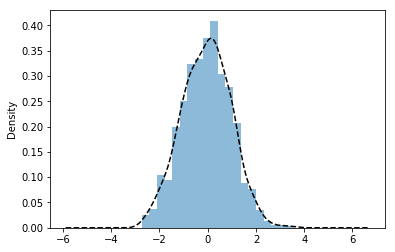

In [20]:
# 直方图
s = pd.Series(np.random.randn(1000))
s.hist(bins = 20,
       histtype = 'bar',
       align = 'mid',
       orientation = 'vertical',
       alpha=0.5,
       normed =True)
# 密度图
s.plot(kind='kde',style='k--')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a184f0160>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

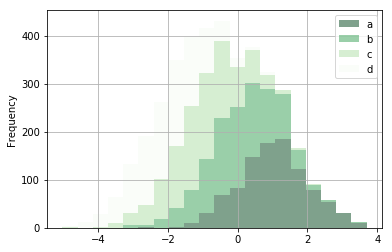

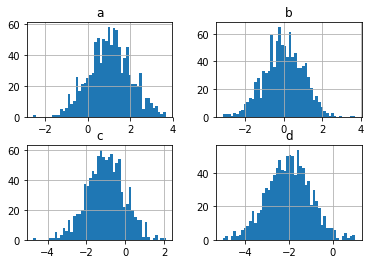

In [21]:
# 堆叠直方图

plt.figure(num=1)
df = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1, 'd': np.random.randn(1000)-2},
                   columns=['a', 'b', 'c','d'])
df.plot.hist(stacked=True,
             bins=20,
             colormap='Greens_r',
             alpha=0.5,
             grid=True)
# 使用DataFrame.plot.hist()和Series.plot.hist()方法绘制

df.hist(bins=50)
# 生成多个直方图

### 6.7 散点图
plt.scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None,
verts=None, edgecolors=None, hold=None, data=None, **kwargs)

参数含义：

- s：散点的大小
- c：散点的颜色
- vmin,vmax：亮度设置，标量
- cmap：colormap

/anaconda3/envs/dl/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


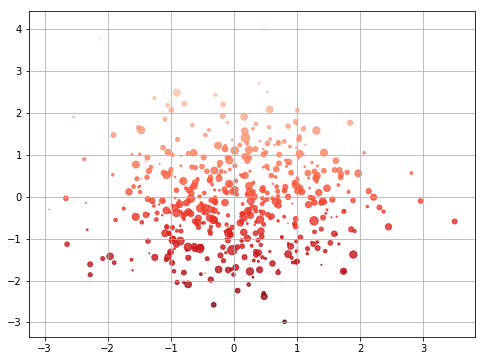

In [22]:
plt.figure(figsize=(8,6))

x = np.random.randn(1000)
y = np.random.randn(1000)

plt.scatter(x,y,marker='.',
           s = np.random.randn(1000)*100,
           cmap = 'Reds_r',
           c = y,
           alpha = 0.8,)
plt.grid()

In [23]:
# pd.scatter_matrix()散点矩阵
# pd.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, 
# grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwds)
# diagonal：({‘hist’, ‘kde’})，必须且只能在{‘hist’, ‘kde’}中选择1个 → 每个指标的频率图
# range_padding：(float, 可选)，图像在x轴、y轴原点附近的留白(padding)，该值越大，留白距离越大，图像远离坐标原点

df = pd.DataFrame(np.random.randn(100,4),columns = ['a','b','c','d'])
pd.scatter_matrix(df,figsize=(10,6),
                 marker = 'o',
                 diagonal='kde',
                 alpha = 0.5,
                 range_padding=0.5)

AttributeError: module 'pandas' has no attribute 'scatter_matrix'